<h2> 1. Loading the UN dataset </h2>

In [1]:
# Importing modules
import pandas as pd
# Read datasets/papers.csv into papers
df = pd.read_csv("C:/Users/david/Documents/0_kul/1_ma_stds_1/0_mda/project/data/consolidated-transcripts.csv")
# Print out the first rows of papers
print(df.head())
print(df.columns)

   Unnamed: 0  Year Session Country  \
0           0  2018      73     BRB   
1           1  2018      73     IND   
2           2  2018      73     ARG   
3           3  2018      73     JOR   
4           4  2018      73     SWE   

                                          Transcript  
0  Let me begin by congratulating Ms. María Ferna...  
1  On my own behalf and on behalf of my country, ...  
2  I would like to congratulate the President on ...  
3  It is an honour to take part in the general de...  
4  Just a bit more than a week ago, we honoured t...  
Index(['Unnamed: 0', 'Year', 'Session', 'Country', 'Transcript'], dtype='object')


<h2> 2. Preparing the data for analysis </h2>

In [2]:
# Remove unnecessary column
df.drop(columns=['Unnamed: 0'],inplace=True)
# Print out the first rows of papers
print(df.head())

   Year Session Country                                         Transcript
0  2018      73     BRB  Let me begin by congratulating Ms. María Ferna...
1  2018      73     IND  On my own behalf and on behalf of my country, ...
2  2018      73     ARG  I would like to congratulate the President on ...
3  2018      73     JOR  It is an honour to take part in the general de...
4  2018      73     SWE  Just a bit more than a week ago, we honoured t...


<h2> 3. Plotting how debates has evolved over time </h2>

<AxesSubplot:xlabel='Year'>

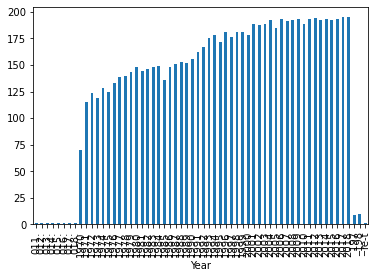

In [3]:
# Group the papers by year
groups = df.groupby('Year')
# Determine the size of each group
counts = groups.size()
# Visualise the counts as a bar plot
import matplotlib.pyplot
%matplotlib inline
counts.plot(kind='bar')

<h2> 4. Preprocessing the text data </h2>

In [4]:
# Load the regular expression library
import re
# Print the titles of the first rows 
print(df['Transcript'].head())

0    Let me begin by congratulating Ms. María Ferna...
1    On my own behalf and on behalf of my country, ...
2    I would like to congratulate the President on ...
3    It is an honour to take part in the general de...
4    Just a bit more than a week ago, we honoured t...
Name: Transcript, dtype: object


In [5]:
# Remove punctuation
df['Transcript_processed'] = df['Transcript'].map(lambda x: re.sub('[,\.!?]', '', str(x)))

In [6]:
# Convert the titles to lowercase
df['Transcript_processed'] = df['Transcript'].map(lambda x:  str(x).lower())

In [7]:
# Print the processed titles of the first rows 
print(df['Transcript_processed'].head())

0    let me begin by congratulating ms. maría ferna...
1    on my own behalf and on behalf of my country, ...
2    i would like to congratulate the president on ...
3    it is an honour to take part in the general de...
4    just a bit more than a week ago, we honoured t...
Name: Transcript_processed, dtype: object


<h2> 5. A word cloud to visualize the preprocessed text data </h2>

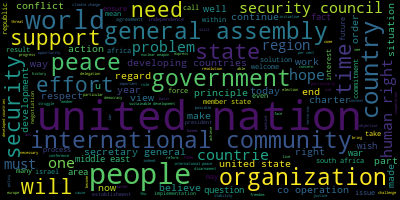

In [8]:
# Import the wordcloud library
import wordcloud
# Join the different processed titles together.
long_string = ' '.join(df['Transcript_processed'])
# Create a WordCloud object
wordcloud = wordcloud.WordCloud()
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

<h2> 6. Prepare the text for LDA analysis </h2>

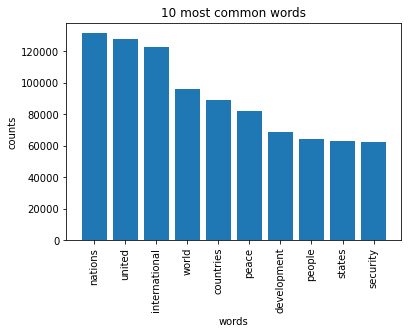

In [9]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('10 most common words')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df.Transcript_processed.values)
# Visualise the 10 most common words
plot_10_most_common_words(count_data,count_vectorizer)

<h2> 7. Analysing trends with LDA </h2>

In [10]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 10
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
countries nations world developing united economic international development south developed

Topic #1:
united states countries peace people international world nations republic nuclear

Topic #2:
international nations world united countries economic new peace political human

Topic #3:
world people nations united country today years countries human war

Topic #4:
nations united international security development human peace world rights council

Topic #5:
peace international nations united development africa countries african country community

Topic #6:
international government country american america nations united states latin peace

Topic #7:
development nations united global international climate states change sustainable countries

Topic #8:
international countries africa people nations south united world economic peace

Topic #9:
international security peace united arab israel nations people states world
